# MACHINE LEARNING

Performing MACHINE LEARNING models on a data

Models used are -

1.LinearRegression

2.Multiple Linear Regression

3.Polynomial Regression

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
# reading dataset
df=pd.read_csv("C:/Users/manish arram/ml/DATA S/PROJECTS/PROJECT 1 & 2/Startups.csv - Startups.csv.csv")
df1=df.copy()

In [3]:
df1.head(2)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


In [4]:
# removing spaces in column names
df1.columns=['RD_Spend','Administration','Marketing_Spend','State','Profit']
df1.head(2)

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


# EDA

## Descriptive statisticas 

In [5]:
# Column names
print("Columns in dataset : ",df1.columns)
#shape of the data
print("shape of dataset : ",df1.shape)

Columns in dataset :  Index(['RD_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit'], dtype='object')
shape of dataset :  (50, 5)


In [6]:
print('Descriptive statistics of dataset : ')
df1.describe()

Descriptive statistics of dataset : 


,RD_Spend,Administration,Marketing_Spend,Profit
count,48.000000,50.000000,47.000000,50.000000
mean,76793.349583,121344.639600,224494.784894,112012.639200
std,44224.086236,28017.802755,113316.503936,40306.180338
min,542.050000,51283.140000,1903.930000,14681.400000
25%,45528.002500,103730.875000,139268.715000,90138.902500
50%,74661.715000,122699.795000,229160.950000,107978.190000
75%,105065.712500,144842.180000,301528.275000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


#### Pair plot

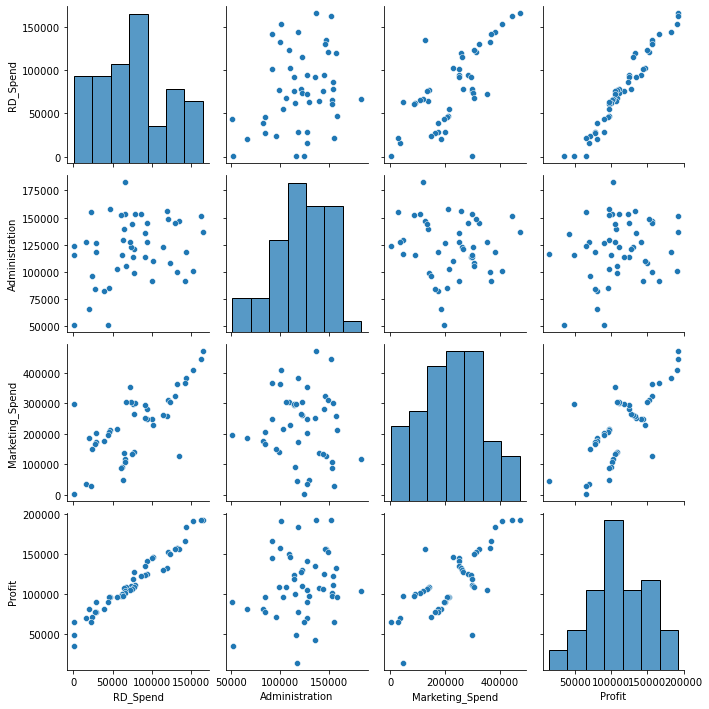

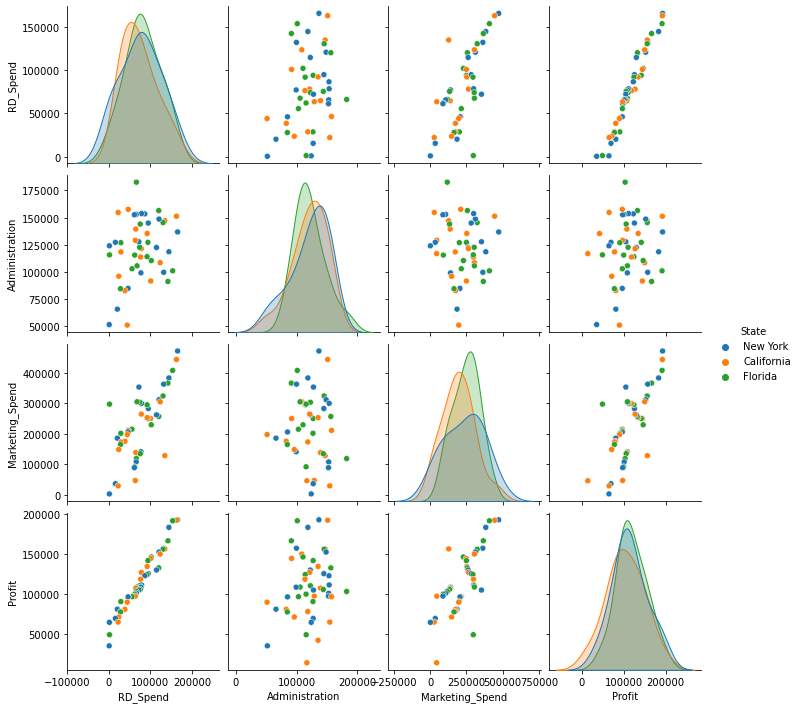

In [7]:
# PAIR PLOT
sns.pairplot(df1)
sns.pairplot(df1,hue='State')

#### Heat Map 

In [8]:
# Correlation with Heatmap
df1.corr()

,RD_Spend,Administration,Marketing_Spend,Profit
RD_Spend,1.000000,0.269749,0.708253,0.977401
Administration,0.269749,1.000000,-0.076943,0.200717
Marketing_Spend,0.708253,-0.076943,1.000000,0.747434
Profit,0.977401,0.200717,0.747434,1.000000


Heat map of dataset : 


<AxesSubplot:>

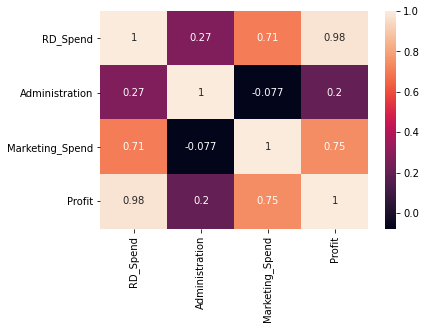

In [9]:
print('Heat map of dataset : ')
sns.heatmap(df1.corr(),annot=True)

## Visualization 

#### Scatter plot 

<AxesSubplot:xlabel='RD_Spend', ylabel='Administration'>

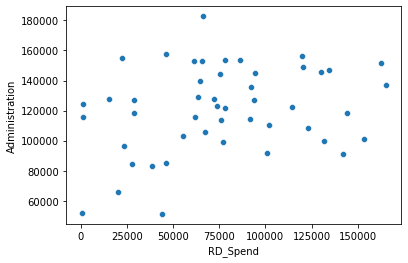

In [10]:
sns.scatterplot(x='RD_Spend',y='Administration',data=df1)

<AxesSubplot:xlabel='Administration', ylabel='Marketing_Spend'>

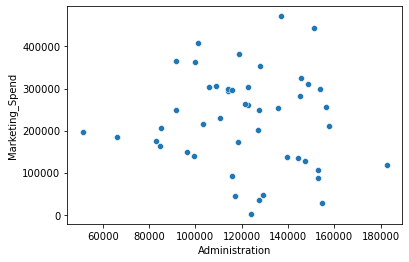

In [11]:
sns.scatterplot(x='Administration',y='Marketing_Spend',data=df1)

<AxesSubplot:xlabel='Marketing_Spend', ylabel='Profit'>

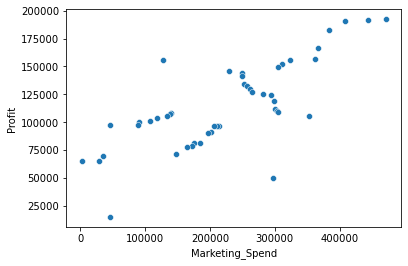

In [12]:
sns.scatterplot(x='Marketing_Spend',y='Profit',data=df1)

#### Histogran 

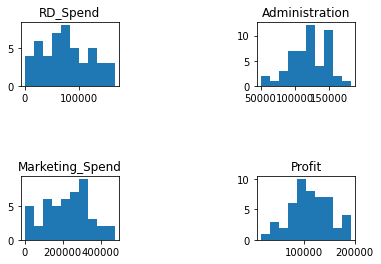

In [13]:
plt.subplot(3,3,1)
plt.hist(df1['RD_Spend'])
plt.title('RD_Spend')

plt.subplot(3,3,3)
plt.hist(df1['Administration'])
plt.title('Administration')

plt.subplot(3,3,7)
plt.hist(df1['Marketing_Spend'])
plt.title('Marketing_Spend')

plt.subplot(3,3,9)
plt.hist(df1['Profit'])
plt.title('Profit')

plt.show()

#### Bar Plot 

<AxesSubplot:xlabel='State', ylabel='RD_Spend'>

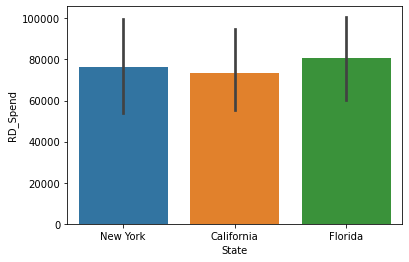

In [14]:
sns.barplot(x='State',y='RD_Spend',data=df1)

<AxesSubplot:xlabel='State', ylabel='Administration'>

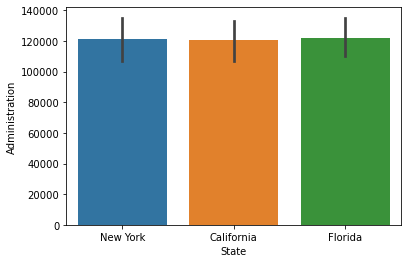

In [15]:
sns.barplot(x='State',y='Administration',data=df1)

<AxesSubplot:xlabel='State', ylabel='Marketing_Spend'>

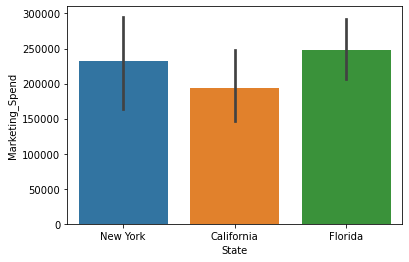

In [16]:
sns.barplot(x='State',y='Marketing_Spend',data=df1)

<AxesSubplot:xlabel='State', ylabel='Profit'>

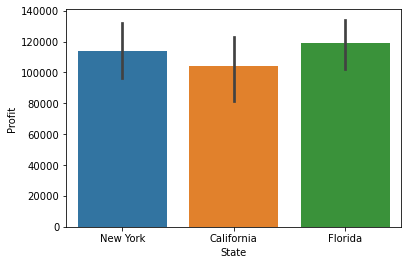

In [17]:
sns.barplot(x='State',y='Profit',data=df1)

#### Count Plot

C:\anaconda\conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='State', ylabel='count'>

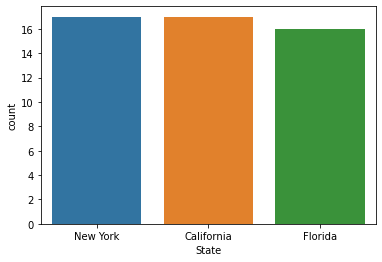

In [18]:
sns.countplot('State',data=df1)

#### Box Plot 

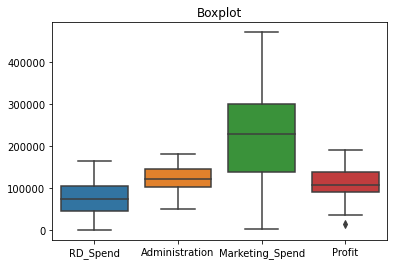

In [19]:
sns.boxplot(data=df1)
plt.title('Boxplot')
plt.show()

# Data Cleaning 

## 1. Dealing with Missing values 

In [20]:
# checking null values
print('NULL Values in each column :')
df1.isnull().sum()

NULL Values in each column :


RD_Spend           2
Administration     0
Marketing_Spend    3
State              0
Profit             0
dtype: int64

visualization of NULL Values in dataset : 


<AxesSubplot:>

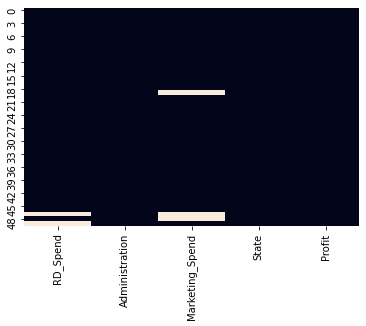

In [21]:
print("visualization of NULL Values in dataset : ")
sns.heatmap(df1.isnull(), cbar=False)

In [22]:
# Replasing NULL Values with median of the same column
from sklearn.impute import SimpleImputer
median_imputer = SimpleImputer(missing_values=np.nan,strategy='median')
df1["RD_Spend"] = pd.DataFrame(median_imputer.fit_transform(df1[["RD_Spend"]]))
df1["Marketing_Spend"] = pd.DataFrame(median_imputer.fit_transform(df1[["Marketing_Spend"]]))
print('After removing NULL Values in each column : ')
df1.isnull().sum()

After removing NULL Values in each column : 


RD_Spend           0
Administration     0
Marketing_Spend    0
State              0
Profit             0
dtype: int64

visualization After removing of NULL Values in dataset : 


<AxesSubplot:>

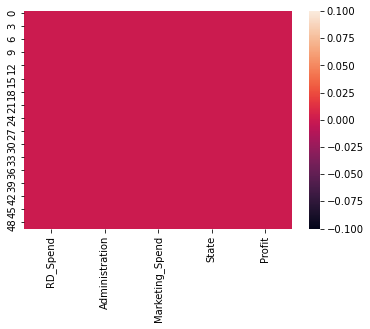

In [23]:
print("visualization After removing of NULL Values in dataset : ")
sns.heatmap(df1.isnull())

## 2. Outlier Treatment 

Box Plot to visualise outliers : 


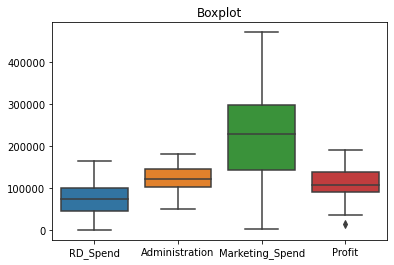

In [24]:
print('Box Plot to visualise outliers : ')
sns.boxplot(data=df1)
plt.title('Boxplot')
plt.show()

In [25]:
# Removing Outliers
min_Profit,max_Profit=df1.Profit.quantile([0.001,0.999])
df1=df1[(df1.Profit>min_Profit)&(df1.Profit<max_Profit)]

Box Plot After removing outliers to visualise outliers : 


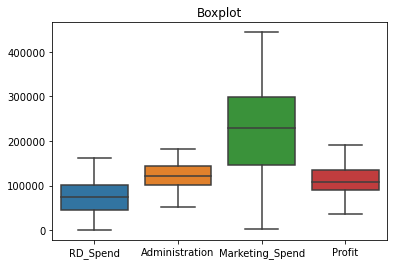

In [26]:
print('Box Plot After removing outliers to visualise outliers : ')
sns.boxplot(data=df1)
plt.title('Boxplot')
plt.show()

# Data Wrangling

## 3. Encoding

In [27]:
#Creating Dummy Values with State column Variables
dummy=pd.get_dummies(df1.State)
# Concatinating dummy values with dataframe
df2=pd.concat([df1,dummy],axis=1)
# Droping State column from dataset
df2.drop('State',axis=1,inplace=True)
#Droping dependent variable California fron dataset
df2.drop('California',axis=1,inplace=True)
df2=pd.get_dummies(df1,drop_first=True)
df2.head(2)

,RD_Spend,Administration,Marketing_Spend,Profit,State_Florida,State_New York
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0


In [28]:
# removing spaces in column names
df2.columns=['RD_Spend','Administration','Marketing_Spend','Profit','State_Florida','State_Newyork']
df2.head(2)

,RD_Spend,Administration,Marketing_Spend,Profit,State_Florida,State_Newyork
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0


## 4.Scaling

In [29]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df2['RD_Spend']=min_max.fit_transform(df2[['RD_Spend']])

min_max=MinMaxScaler()
df2['Administration']=min_max.fit_transform(df2[['Administration']])

min_max=MinMaxScaler()
df2['Marketing_Spend']=min_max.fit_transform(df2[['Marketing_Spend']])

min_max=MinMaxScaler()
df2['Profit']=min_max.fit_transform(df2[['Profit']])

In [30]:
df2.head(2)

,RD_Spend,Administration,Marketing_Spend,Profit,State_Florida,State_Newyork
1,1.0000,0.761972,1.000000,1.000000,0,0
2,0.9435,0.379579,0.918633,0.995249,1,0


In [31]:
df2.corr()

,RD_Spend,Administration,Marketing_Spend,Profit,State_Florida,State_Newyork
RD_Spend,1.000000,0.257262,0.650976,0.936577,0.098427,-0.072402
Administration,0.257262,1.000000,-0.111650,0.191349,0.016478,-0.013225
Marketing_Spend,0.650976,-0.111650,1.000000,0.631444,0.166391,-0.041899
Profit,0.936577,0.191349,0.631444,1.000000,0.124348,-0.068307
State_Florida,0.098427,0.016478,0.166391,0.124348,1.000000,-0.500000
State_Newyork,-0.072402,-0.013225,-0.041899,-0.068307,-0.500000,1.000000


## Model 1- LinearRegression with RD_Spend & Profit

In [32]:
# option to consider x & y variables (if y is not at the start or at the end)
x=df2['RD_Spend']
y=df2['Profit']

In [33]:
y.corr(x)

0.9365768990901436

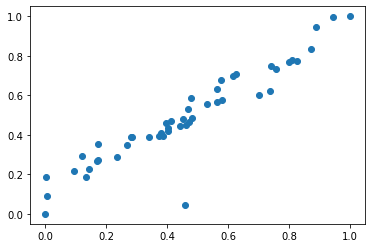

In [34]:
plt.scatter(x,y)

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
# Fitting model
ml1=smf.OLS(y_train,x_train).fit()
# print the parameters and interprete them
print(ml1.params)

RD_Spend    0.998758
dtype: float64


In [36]:
# predict values test dataset
y_pred_test=ml1.predict(x_test)
y_pred_train=ml1.predict(x_train)

In [37]:
# r2 & rmse for train data
ml1_train_r2=np.abs(r2_score(y_train,y_pred_train))
print(ml1_train_r2)
ml1_train_rmse=np.sqrt(mean_squared_error(y_train,y_pred_train))
print(ml1_train_rmse)

0.8184057530377284
0.10452770584661106


In [38]:
# r2 & rmse for test data
ml1_test_r2=np.abs(r2_score(y_test,y_pred_test))
print(ml1_test_r2)
ml1_test_rmse=np.sqrt(mean_squared_error(y_test,y_pred_test))
print(ml1_test_rmse)

0.8528355280608
0.0757905263207093


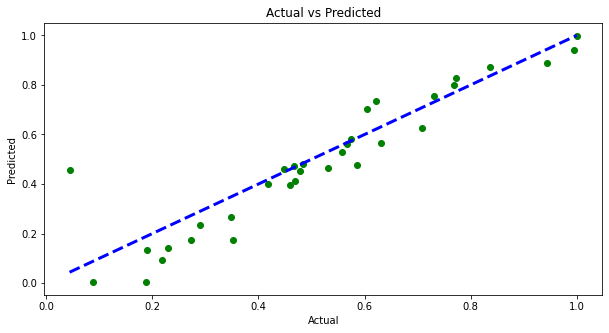

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.scatter(y_train,y_pred_train,c='green')
plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()],'k--',c='blue',lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

## Model 2-LinearRegression with Administration & Profit 

In [40]:
x=df2['Administration']
y=df2['Profit']

In [41]:
y.corr(x) #no correlation

0.19134872917928736

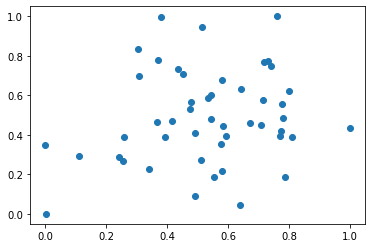

In [42]:
plt.scatter(x,y) 

#### Model 2 - No Collineaity between Administration & Profit they are not Linear so cannot perform LinearRegression 

## Model 3-LinearRegression with Marketing_Spend & Profit

In [43]:
x=df2['Marketing_Spend']
y=df2['Profit']

In [44]:
y.corr(x)

0.6314435315087937

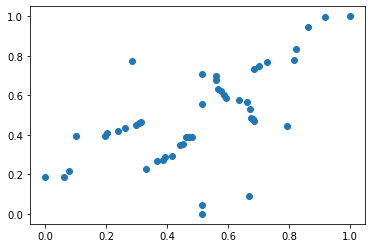

In [45]:
plt.scatter(x,y)

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
# Fitting model
ml3=smf.OLS(y_train,x_train).fit()
# print the parameters and interprete them
print(ml3.params)

Marketing_Spend    0.934586
dtype: float64


In [47]:
# predict values test dataset
y_pred_test=ml3.predict(x_test)
y_pred_train=ml3.predict(x_train)

In [48]:
# r2 & rmse for train data
ml3_train_r2=np.abs(r2_score(y_train,y_pred_train))
print(ml3_train_r2)
ml3_train_rmse=np.sqrt(mean_squared_error(y_train,y_pred_train))
print(ml3_train_rmse)

0.3996399624949861
0.19005804773436816


In [49]:
# r2 & rmse for test data
ml3_test_r2=np.abs(r2_score(y_test,y_pred_test))
print(ml3_test_r2)
ml3_test_rmse=np.sqrt(mean_squared_error(y_test,y_pred_test))
print(ml3_test_rmse)

0.0688557086155781
0.20425513113015117


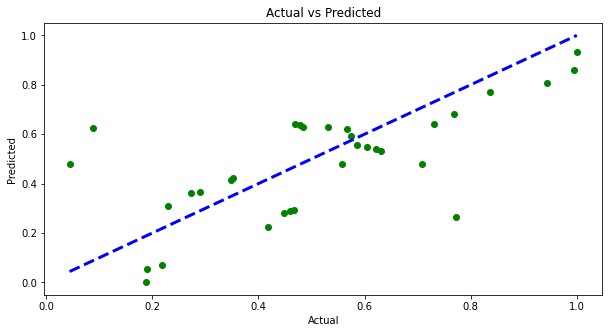

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.scatter(y_train,y_pred_train,c='green')
plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()],'k--',c='blue',lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

## Model 4-LinearRegression with State_Florida & Profit 

In [51]:
x=df2['State_Florida']
y=df2['Profit']

In [52]:
y.corr(x)#no correlation

0.12434811484563993

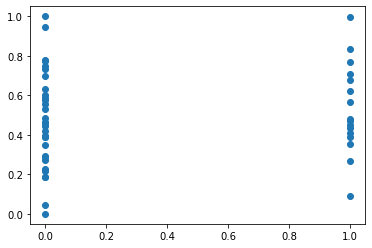

In [53]:
plt.scatter(x,y) 

#### Model 4 - No Collineaity between State_Florida & Profit they are not Linear so cannot perform LinearRegression

## Model 5-LinearRegression with State_Newyork & Profit

In [54]:
x=df2['State_Newyork']
y=df2['Profit']

In [55]:
y.corr(x)#no correlation

-0.06830653591519738

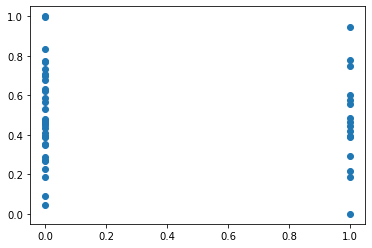

In [56]:
plt.scatter(x,y)

#### Model 5 - No Collineaity between State_Newyork & Profit they are not Linear so cannot perform LinearRegression

## Model 6- Multiple Linear Regression  

In [57]:
df3=df2.copy()

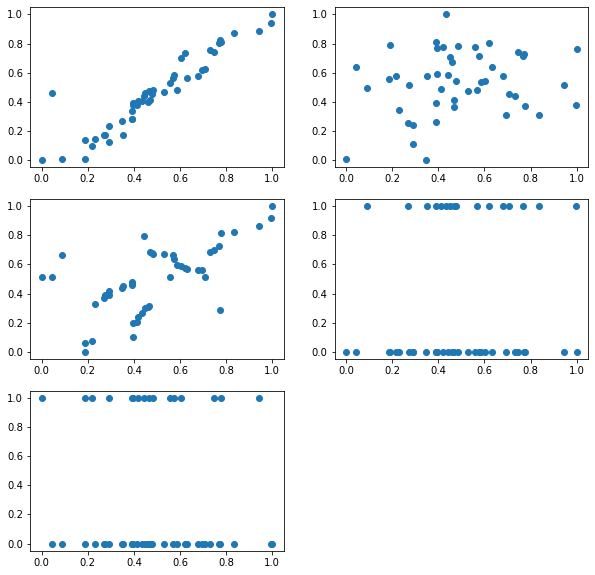

In [58]:
# Check collinearuty btwn dependent and independent variables
plt.figure(figsize=(10,10))

plt.subplot(3,2,1)
plt.scatter(df3.Profit,df3.RD_Spend)

plt.subplot(3,2,2)
plt.scatter(df3.Profit,df3.Administration)#not collinear

plt.subplot(3,2,3)
plt.scatter(df3.Profit,df3.Marketing_Spend)

plt.subplot(3,2,4)
plt.scatter(df3.Profit,df3.State_Florida)#not collinear

plt.subplot(3,2,5)
plt.scatter(df3.Profit,df3.State_Newyork)#not collinear


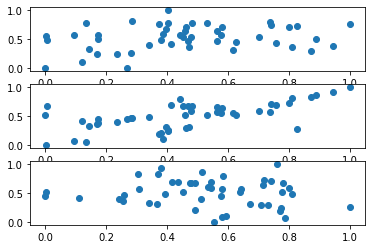

In [59]:
# Check collinearity btwn independent variables

plt.subplot(3,1,1)
plt.scatter(df3.RD_Spend,df3.Administration)

plt.subplot(3,1,2)
plt.scatter(df3.RD_Spend,df3.Marketing_Spend)

plt.subplot(3,1,3)
plt.scatter(df3.Administration,df3.Marketing_Spend)


In [60]:
x=df3.drop(['Profit','Administration'],axis=1).values
y=df3['Profit'].values

# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

# creating and fitting the multiple linear model
# importing linearRegression
from sklearn.linear_model import LinearRegression
# the model
ml6=LinearRegression()

# train model on training data
ml6.fit(x_train,y_train)

# predict values test dataset
y_pred_test=ml6.predict(x_test)
y_pred_train=ml6.predict(x_train)

In [61]:
# r2 & rmse for train data
ml6_train_r2=np.abs(r2_score(y_train,y_pred_train))
print(ml6_train_r2)
ml6_train_rmse=np.sqrt(mean_squared_error(y_train,y_pred_train))
print(ml6_train_rmse)

0.862524349582611
0.09094802393479605


In [62]:
# r2 & rmse for test data
ml6_test_r2=np.abs(r2_score(y_test,y_pred_test))
print(ml6_test_r2)
ml6_test_rmse=np.sqrt(mean_squared_error(y_test,y_pred_test))
print(ml6_test_rmse)

0.9199120541674429
0.055910968094460126


## Model 7- Polynomial Regression 

In [63]:
x=df3.drop(['Profit','Administration'],axis=1).values
y=df3[['Profit']].values

from sklearn.preprocessing import PolynomialFeatures
# 
poly_convert=PolynomialFeatures(degree=2,include_bias=False)
# fitting the transformer and gives new polynomial data
poly_features=poly_convert.fit_transform(x)

# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(poly_features,y,test_size=0.3,random_state=0)

# creating and fitting the polynomial model
# importing linearRegression
from sklearn.linear_model import LinearRegression
# the model
ml7=LinearRegression()

# train model on training data
ml7.fit(x_train,y_train)

# predict values test dataset
y_pred_test=ml7.predict(x_test)
y_pred_train=ml7.predict(x_train)

In [64]:
# r2 & rmse for train data
ml7_train_r2=np.abs(r2_score(y_train,y_pred_train))
print(ml7_train_r2)
ml7_train_rmse=np.sqrt(mean_squared_error(y_train,y_pred_train))
print(ml7_train_rmse)

0.8789547234991062
0.08534032634374951


In [65]:
# r2 & rmse for test data
ml7_test_r2=np.abs(r2_score(y_test,y_pred_test))
print(ml7_test_r2)
ml7_test_rmse=np.sqrt(mean_squared_error(y_test,y_pred_test))
print(ml7_test_rmse)

0.8984651199362967
0.06295367169364419


In [66]:
from pandas import DataFrame
b=DataFrame({   'Model':['LinearRegression(RD_Spend & Profit)','LinearRegression(Administration & Profit)','LinearRegression(Marketing_Spend & Profit)','LinearRegression(State_Florida & Profit)','LinearRegression(State_Newyork & Profit)','Multiple Linear Regression','*** Polynomial Regression'],
                'Train_R2':[ml1_train_r2,'Cant',ml3_train_r2,'Cant','Cant',ml6_train_r2,ml7_train_r2],
                'Test_R2':[ml1_test_r2,'Perform',ml3_test_r2,'Perform','Perform',ml6_test_r2,ml7_test_r2],
                'Train_RMSE':[ml1_train_rmse,'LinearRegression',ml3_train_rmse,'LinearRegression','LinearRegression',ml6_train_rmse,ml7_train_rmse],
                'Test_RMSE':[ml1_test_rmse,'on this Data',ml3_test_rmse,'on this Data','on this Data',ml6_test_rmse,ml7_test_rmse]   })
b

,Model,Train_R2,Test_R2,Train_RMSE,Test_RMSE
0,LinearRegression(RD_Spend & Profit),0.818406,0.852836,0.104528,0.0757905
1,LinearRegression(Administration & Profit),Cant,Perform,LinearRegression,on this Data
2,LinearRegression(Marketing_Spend & Profit),0.39964,0.0688557,0.190058,0.204255
3,LinearRegression(State_Florida & Profit),Cant,Perform,LinearRegression,on this Data
4,LinearRegression(State_Newyork & Profit),Cant,Perform,LinearRegression,on this Data
5,Multiple Linear Regression,0.862524,0.919912,0.090948,0.055911
6,*** Polynomial Regression,0.878955,0.898465,0.0853403,0.0629537


### Model 7- Polynomial Regression model is  with best R2 & RMSE for both train & test data

In [67]:
import pickle
pickle.dump(ml7,open('model_ml7.pkl','wb'))

In [68]:
pip freeze >requirements.txt

Note: you may need to restart the kernel to use updated packages.
